In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [3]:
filename = '../csv_detection_info/18_2, artrose.csv'
filename_clean = '../csv_detection_info_clean/18_2, artrose.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/18/2, artrose'

In [4]:
detection_df = pd.read_csv(filename)

In [5]:
detection_df

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
135  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
136  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
137  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
138  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
139  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.82.1.1.1314.1498695243.10.100.37.110...     1763     1935   
1             1.2.276.0.95.17743.20180723.143656.0.dcm      543      688   
2              1.2.276.0.95.17743.20180921.93825.0.dcm      626      771   
3             1.2.276.0.95.17743.20181102.123221.0.dcm     1248     1403   
4           1.2.276.0.95.17831.20180509.101856.0.0.dcm      777      969   
..                                                 ...      ...      ...   
135  1.3.51.0.7.526317112.60015.64842.34709.4182.42...      408      551   
136  1.3.51.0.7.592900433.19003.16713.40056.36487.5...      535      677   
137  1.3.51.0.7.945569572.20763.19790.48758.536.553...      630      868   
138  1.3.51.0.7.952993026.53061.65093.47998.29407.5...     1258     1448   
139  1.3.51.0.7.973979672.25718.12356.46836.30840.3...      890     1055   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0       1123     1295    0.521844    18          2    2, artrose  
1        581      726    0.659903    18          2    2, artrose  
2        669      814    0.854517    18          2    2, artrose  
3       1344     1499    0.999568    18          2    2, artrose  
4        926     1118    0.957726    18          2    2, artrose  
..       ...      ...         ...   ...        ...           ...  
135      720      864    0.999998    18          2    2, artrose  
136      457      599    0.999999    18          2    2, artrose  
137     1366     1602    0.967501    18          2    2, artrose  
138     1686     1877    0.986837    18          2    2, artrose  
139     1591     1756    0.999999    18          2    2, artrose  

[140 rows x 10 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([12, 15, 46, 47, 52, 59, 98, 114], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

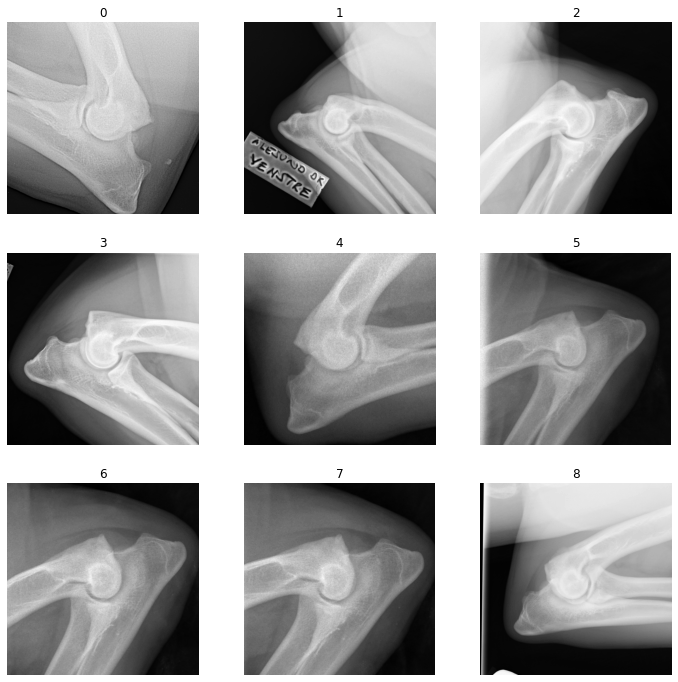

C:\NMBU\TEMP\ipykernel_6196\89006417.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')
C:\NMBU\TEMP\ipykernel_6196\89006417.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


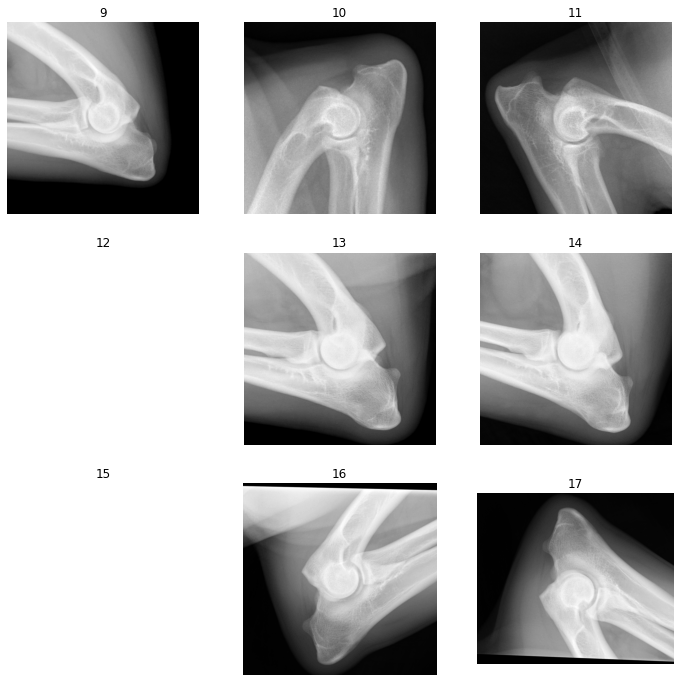

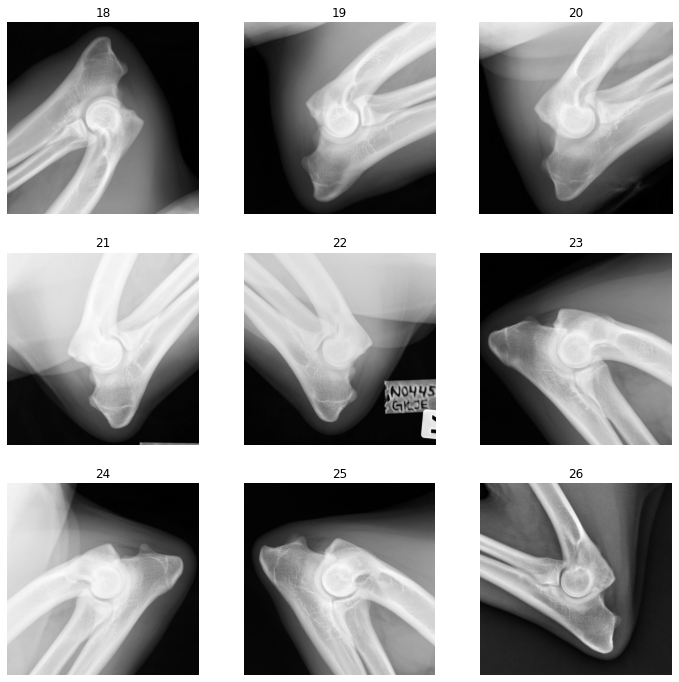

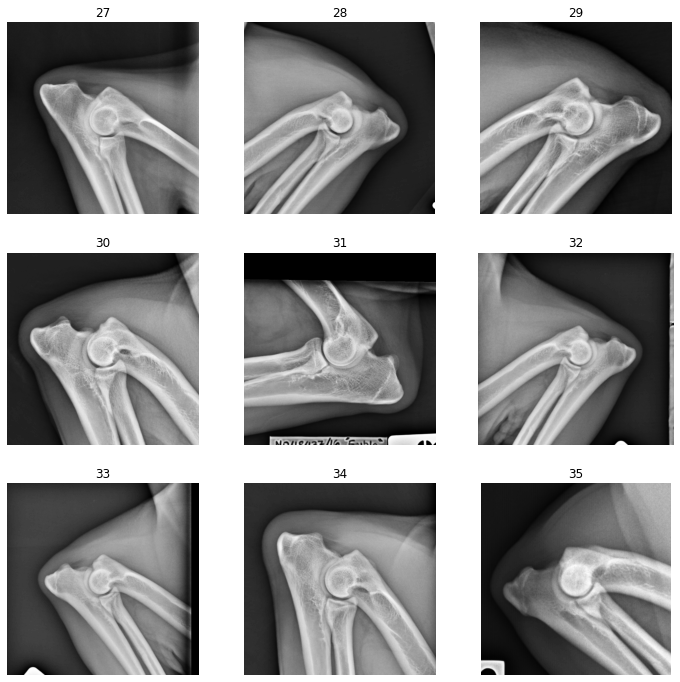

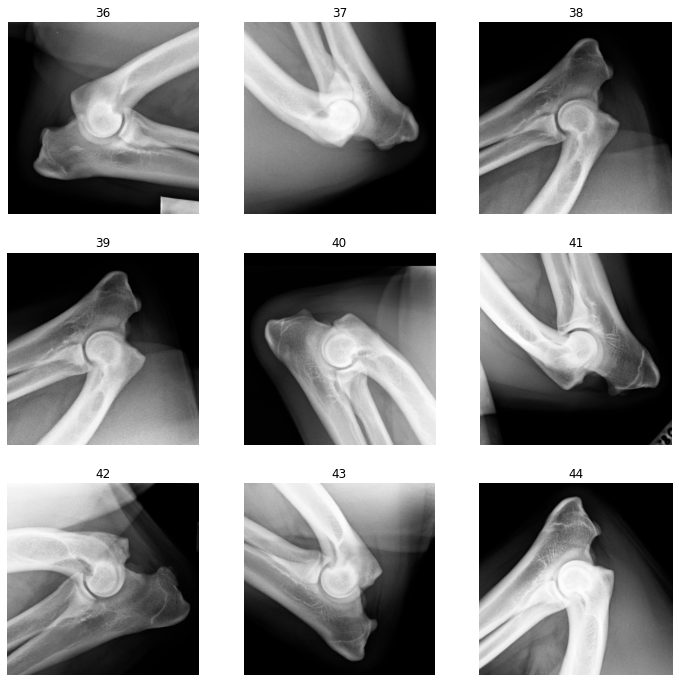

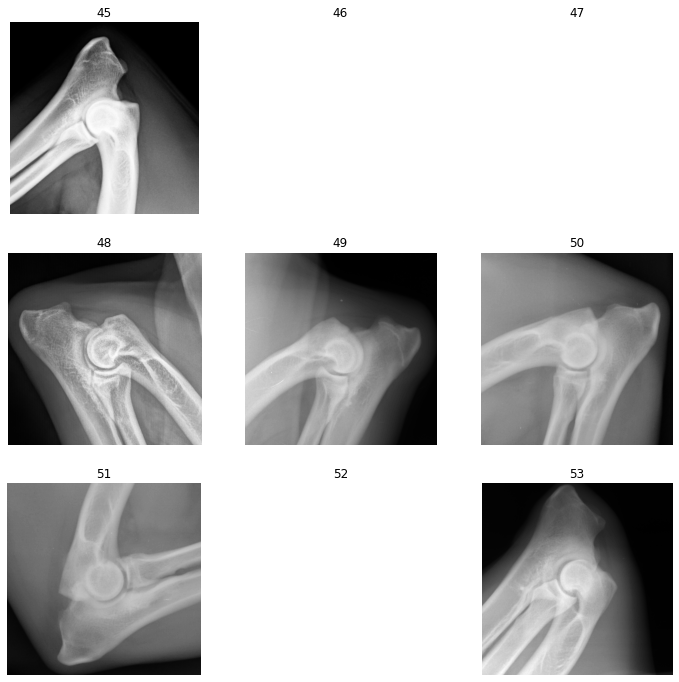

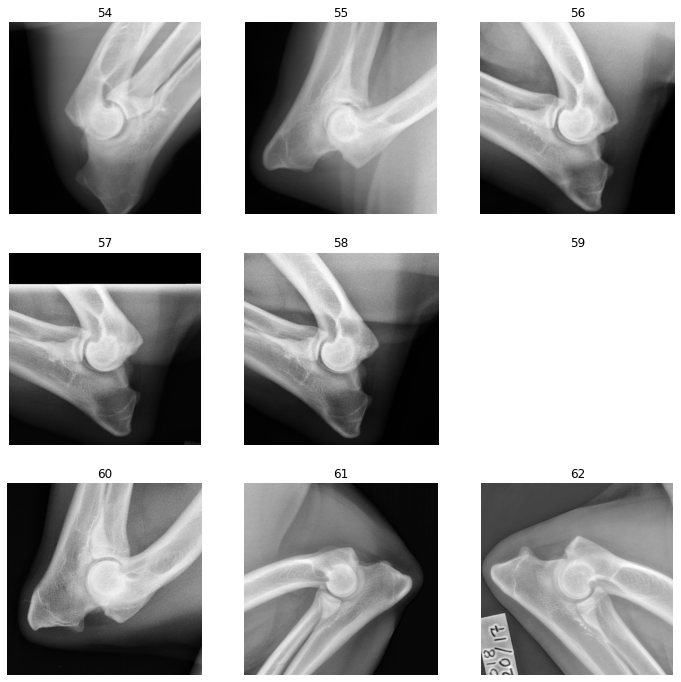

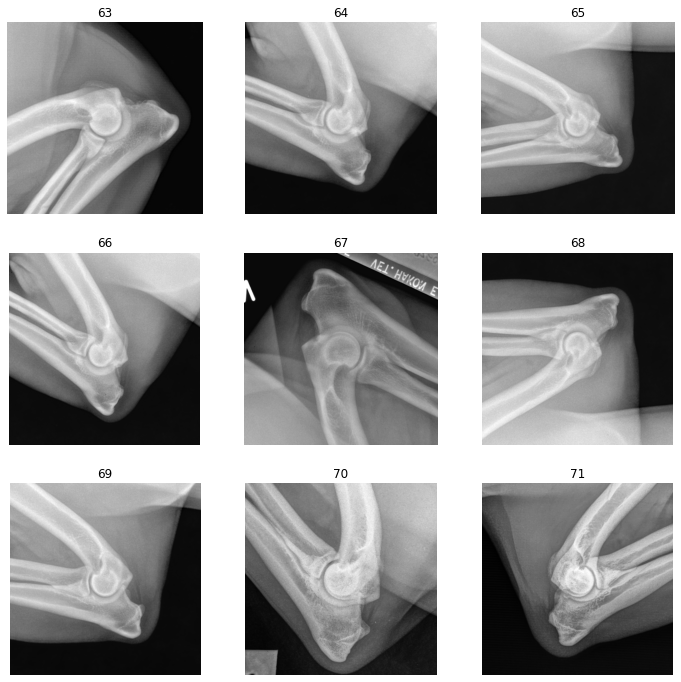

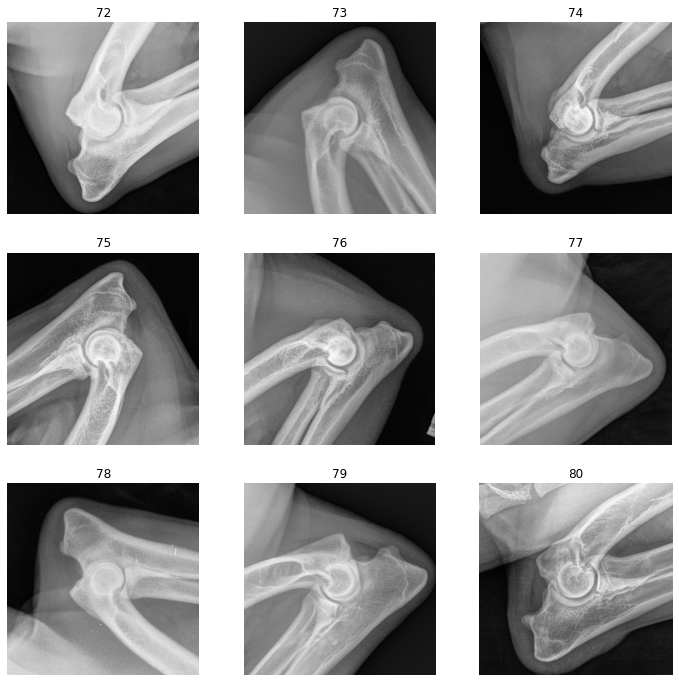

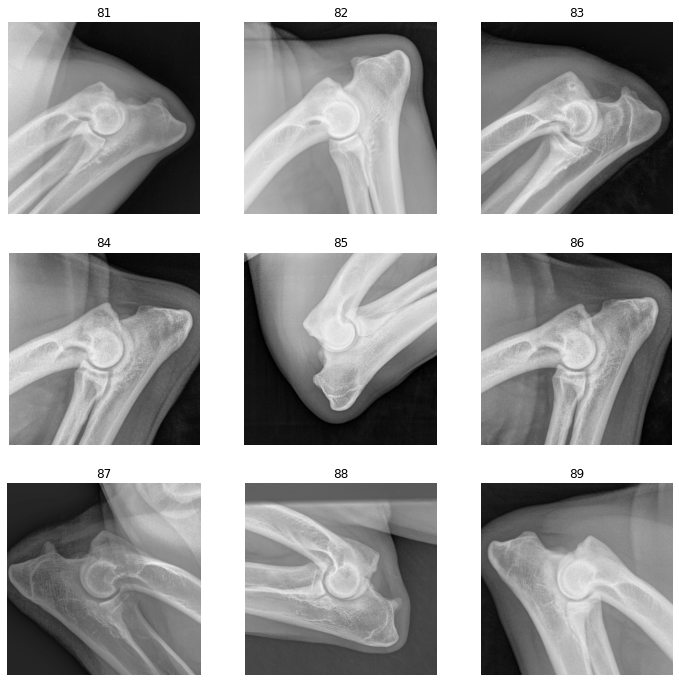

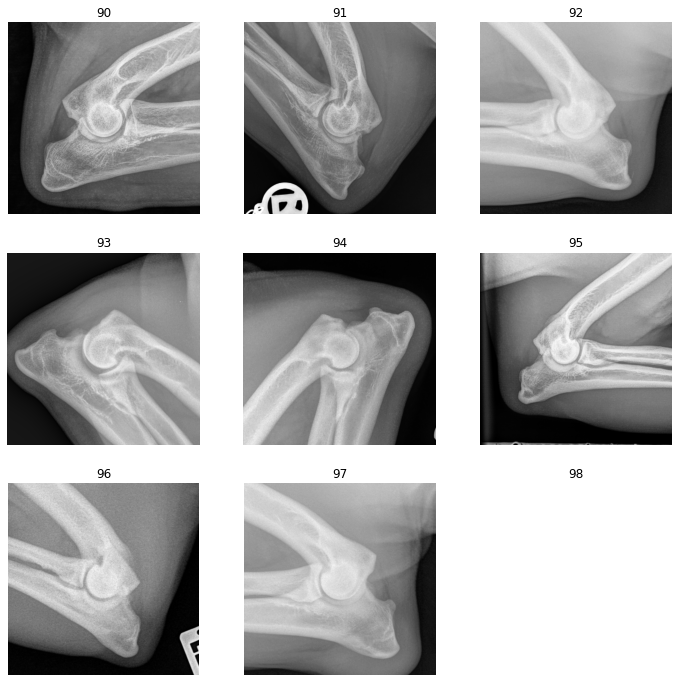

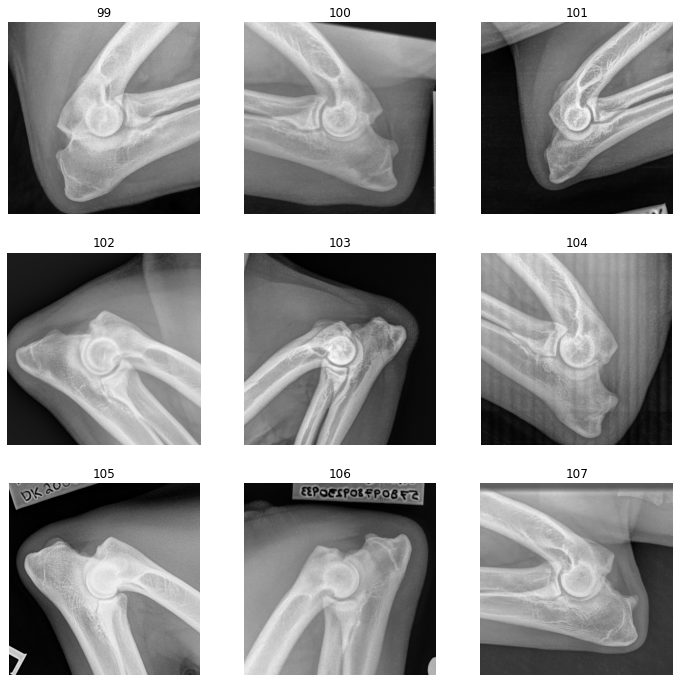

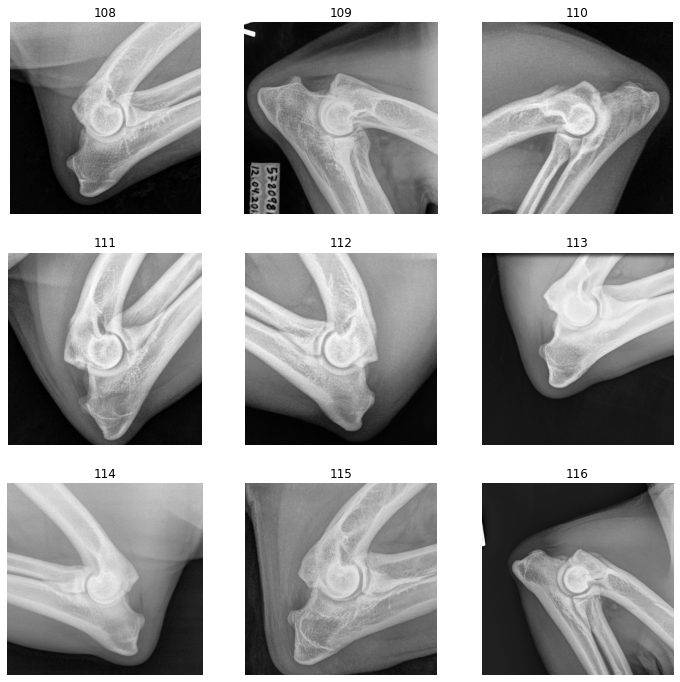

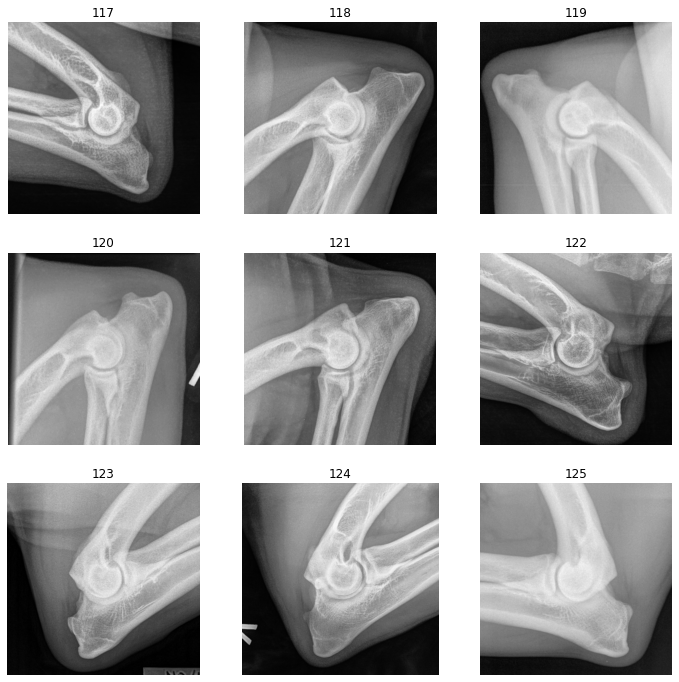

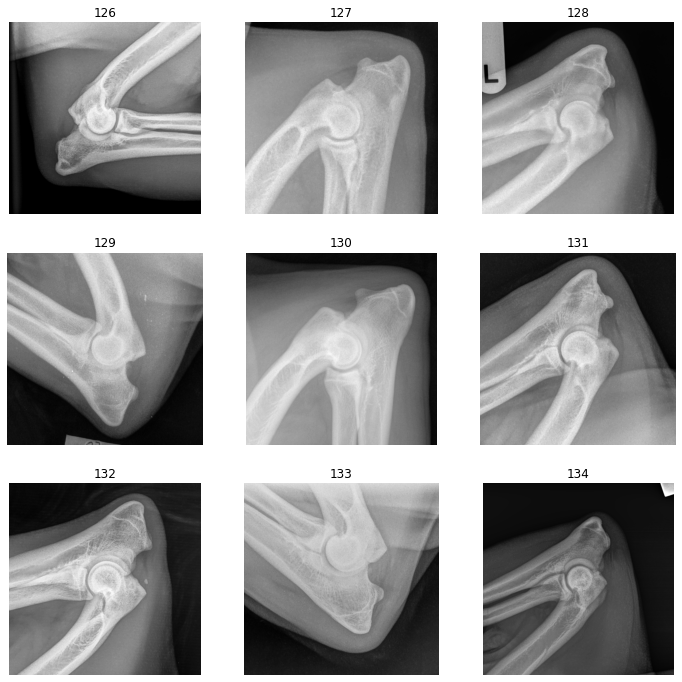

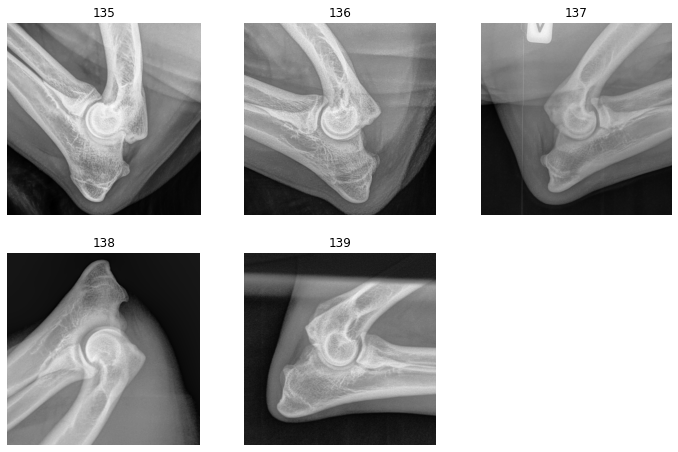

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
remove_indice = [12, 15, 46, 47, 52, 59, 98]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
135  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
136  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
137  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
138  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
139  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.82.1.1.1314.1498695243.10.100.37.110...     1763     1935   
1             1.2.276.0.95.17743.20180723.143656.0.dcm      543      688   
2              1.2.276.0.95.17743.20180921.93825.0.dcm      626      771   
3             1.2.276.0.95.17743.20181102.123221.0.dcm     1248     1403   
4           1.2.276.0.95.17831.20180509.101856.0.0.dcm      777      969   
..                                                 ...      ...      ...   
135  1.3.51.0.7.526317112.60015.64842.34709.4182.42...      408      551   
136  1.3.51.0.7.592900433.19003.16713.40056.36487.5...      535      677   
137  1.3.51.0.7.945569572.20763.19790.48758.536.553...      630      868   
138  1.3.51.0.7.952993026.53061.65093.47998.29407.5...     1258     1448   
139  1.3.51.0.7.973979672.25718.12356.46836.30840.3...      890     1055   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0       1123     1295    0.521844    18          2    2, artrose  
1        581      726    0.659903    18          2    2, artrose  
2        669      814    0.854517    18          2    2, artrose  
3       1344     1499    0.999568    18          2    2, artrose  
4        926     1118    0.957726    18          2    2, artrose  
..       ...      ...         ...   ...        ...           ...  
135      720      864    0.999998    18          2    2, artrose  
136      457      599    0.999999    18          2    2, artrose  
137     1366     1602    0.967501    18          2    2, artrose  
138     1686     1877    0.986837    18          2    2, artrose  
139     1591     1756    0.999999    18          2    2, artrose  

[133 rows x 10 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
new_detection_df.to_csv(filename_clean, index=False)